In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import data
df = pd.read_csv("Aemf1.csv")

# Clean data
df = df.drop(columns=["Attraction Index", "Normalised Attraction Index", "Restraunt Index", "Normalised Restraunt Index", "Shared Room", "Private Room", "Superhost"])
df.columns = [column.replace(" ", "_").replace("(", "").replace(")", "").lower() for column in df.columns]

# Change numerical variables that can be considered categorical to the object type
categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 3]
categorical_from_numerical
df_categorical = pd.concat([df.select_dtypes("object"), categorical_from_numerical], axis=1)
df_numerical = df.select_dtypes("number").drop(columns=categorical_from_numerical.columns)

In [3]:
df

,city,price,day,room_type,person_capacity,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km
0,Amsterdam,194.033698,Weekday,Private room,2.0,1,0,10.0,93.0,1,5.022964,2.539380
1,Amsterdam,344.245776,Weekday,Private room,4.0,0,0,8.0,85.0,1,0.488389,0.239404
2,Amsterdam,264.101422,Weekday,Private room,2.0,0,1,9.0,87.0,1,5.748312,3.651621
3,Amsterdam,433.529398,Weekday,Private room,4.0,0,1,9.0,90.0,2,0.384862,0.439876
4,Amsterdam,485.552926,Weekday,Private room,2.0,0,0,10.0,98.0,1,0.544738,0.318693
...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,6.0,0,1,10.0,100.0,3,0.530181,0.135447
41710,Vienna,304.793960,Weekend,Entire home/apt,2.0,0,0,8.0,86.0,1,0.810205,0.100839
41711,Vienna,637.168969,Weekend,Entire home/apt,2.0,0,0,10.0,93.0,1,0.994051,0.202539
41712,Vienna,301.054157,Weekend,Private room,2.0,0,0,10.0,87.0,1,3.044100,0.287435


In [4]:
df_categorical

,city,day,room_type,multiple_rooms,business
0,Amsterdam,Weekday,Private room,1,0
1,Amsterdam,Weekday,Private room,0,0
2,Amsterdam,Weekday,Private room,0,1
3,Amsterdam,Weekday,Private room,0,1
4,Amsterdam,Weekday,Private room,0,0
...,...,...,...,...,...
41709,Vienna,Weekend,Entire home/apt,0,1
41710,Vienna,Weekend,Entire home/apt,0,0
41711,Vienna,Weekend,Entire home/apt,0,0
41712,Vienna,Weekend,Private room,0,0


In [6]:
df_numerical

,price,person_capacity,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km
0,194.033698,2.0,10.0,93.0,1,5.022964,2.539380
1,344.245776,4.0,8.0,85.0,1,0.488389,0.239404
2,264.101422,2.0,9.0,87.0,1,5.748312,3.651621
3,433.529398,4.0,9.0,90.0,2,0.384862,0.439876
4,485.552926,2.0,10.0,98.0,1,0.544738,0.318693
...,...,...,...,...,...,...,...
41709,715.938574,6.0,10.0,100.0,3,0.530181,0.135447
41710,304.793960,2.0,8.0,86.0,1,0.810205,0.100839
41711,637.168969,2.0,10.0,93.0,1,0.994051,0.202539
41712,301.054157,2.0,10.0,87.0,1,3.044100,0.287435


In [7]:
df.columns

Index(['city', 'price', 'day', 'room_type', 'person_capacity',
       'multiple_rooms', 'business', 'cleanliness_rating',
       'guest_satisfaction', 'bedrooms', 'city_center_km',
       'metro_distance_km'],
      dtype='object')

In [8]:
df_categorical.columns

Index(['city', 'day', 'room_type', 'multiple_rooms', 'business'], dtype='object')

In [9]:
df_numerical.columns

Index(['price', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction',
       'bedrooms', 'city_center_km', 'metro_distance_km'],
      dtype='object')

# Bivariate EDA

## Categorical vs. Categorical variables

In [23]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

### City vs. Day (Weekday/Weekend)

In [16]:
crosstab_cityvsday = pd.crosstab(df['city'], df['day'])

crosstab_cityvsday

day,Weekday,Weekend
city,,
Amsterdam,1103,977
Athens,2653,2627
Barcelona,1555,1278
Berlin,1284,1200
Budapest,2074,1948
Lisbon,2857,2906
Paris,3130,3558
Rome,4492,4535
Vienna,1738,1799


In [30]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_cityvsday)


print(f"P-value: {chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_cityvsday, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.04114425148154461


<Axes: xlabel='city'>

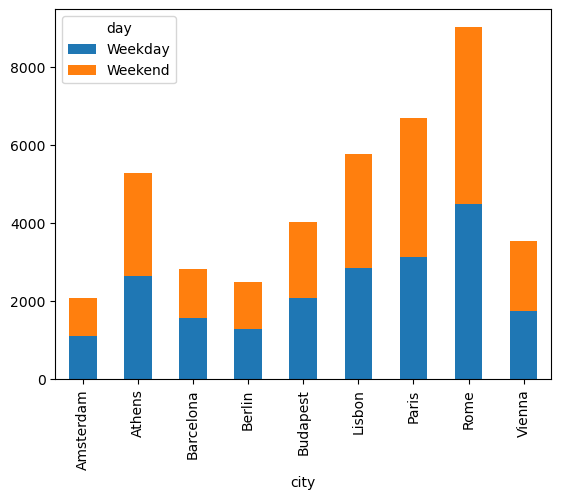

In [17]:
crosstab_cityvsday.plot(kind="bar", stacked=True)

### City vs. Room Type (Entire Home/Apt, Private Room, Shared Room)

In [15]:
crosstab_cityvsroomtype = pd.crosstab(df['city'], df['room_type'])

crosstab_cityvsroomtype

room_type,Entire home/apt,Private room,Shared room
city,,,
Amsterdam,1126,944,10
Athens,4872,397,11
Barcelona,542,2279,12
Berlin,882,1529,73
Budapest,3589,419,14
Lisbon,3878,1811,74
Paris,5067,1527,94
Rome,5561,3454,12
Vienna,2747,774,16


In [31]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_cityvsroomtype)


print(f"P-value: {chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_cityvsroomtype, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.3009779513721108


<Axes: xlabel='city'>

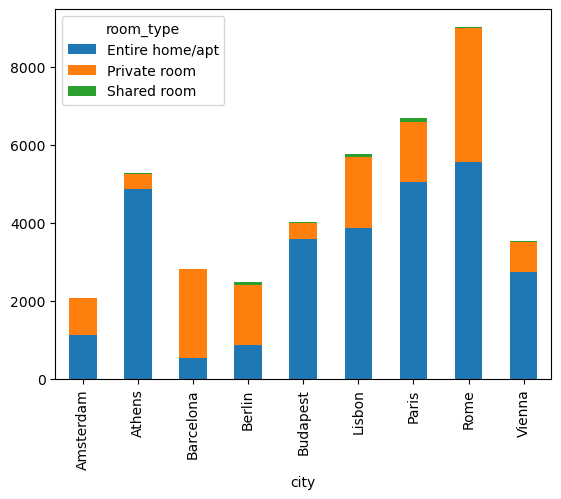

In [18]:
crosstab_cityvsroomtype.plot(kind="bar", stacked=True)

### City vs. Multiple Rooms (0 = one room only, 1 = multiple rooms)

In [19]:
crosstab_cityvsmultiplerooms = pd.crosstab(df['city'], df['multiple_rooms'])

crosstab_cityvsmultiplerooms

multiple_rooms,0,1
city,,
Amsterdam,1491,589
Athens,3868,1412
Barcelona,1742,1091
Berlin,1798,686
Budapest,2802,1220
Lisbon,4383,1380
Paris,5220,1468
Rome,5543,3484
Vienna,2550,987


In [32]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_cityvsmultiplerooms)


print(f"P-value: {chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_cityvsmultiplerooms, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.13574355824609313


<Axes: xlabel='city'>

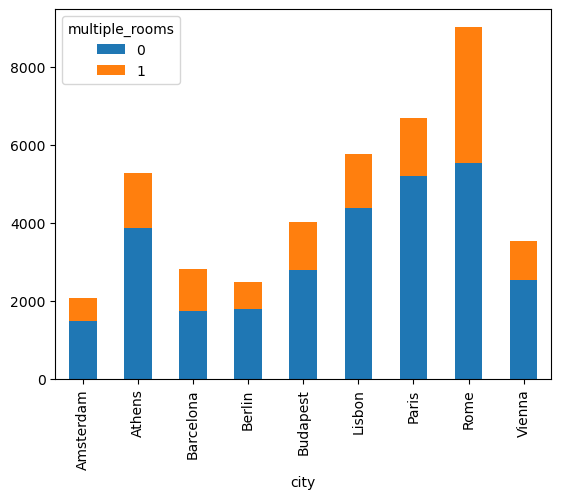

In [20]:
crosstab_cityvsmultiplerooms.plot(kind="bar", stacked=True)

#### City vs. Business (0 = no business, 4 or less offers; 1 = bussiness, more than 4 offers)

In [21]:
crosstab_cityvsbusiness = pd.crosstab(df['city'], df['business'])

crosstab_cityvsbusiness

business,0,1
city,,
Amsterdam,1861,219
Athens,3274,2006
Barcelona,1911,922
Berlin,2050,434
Budapest,2619,1403
Lisbon,2377,3386
Paris,5044,1644
Rome,6011,3016
Vienna,2335,1202


In [33]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_cityvsbusiness)


print(f"P-value: {chi2_p_value.round(2)}")
print(f"Cramér's V value of {association(crosstab_cityvsbusiness, method="cramer")}")

P-value: 0.0
Cramér's V value of 0.25391048393486576


<Axes: xlabel='city'>

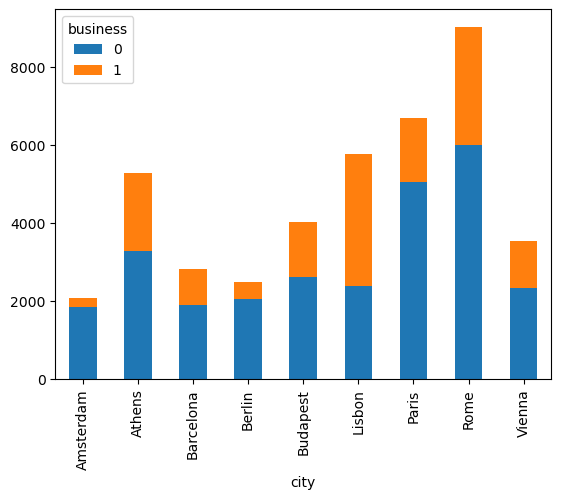

In [22]:
crosstab_cityvsbusiness.plot(kind="bar", stacked=True)

## Numeric vs. Categorical variables

### Remove Outliers

In [35]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [41]:
outliers = tukeys_test_outliers(df["price"])

In [42]:
outliers.sort_values()

12360      527.484341
28677      527.542175
35384      527.669324
11243      527.718052
30877      527.903116
             ...     
38222    12942.991375
40794    13656.358834
38387    13664.305916
24810    16445.614689
3590     18545.450285
Name: price, Length: 2891, dtype: float64

In [46]:
df_nopriceoutliers = df[df["price"] < 527]
df_onlypriceoutliers = df[df["price"] > 527]

### Price weekdays vs Price weekend

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_6605/1154753299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day', y='price', palette="coolwarm")


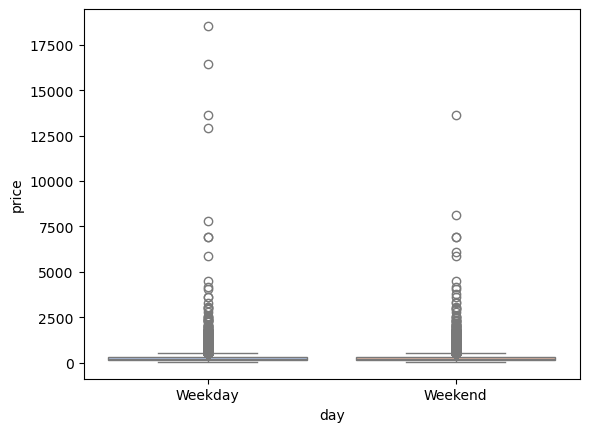

In [51]:
# With outliers
sns.boxplot(data=df, x='day', y='price', palette="coolwarm")
plt.show();

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_6605/1872024027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_nopriceoutliers, x='day', y='price', palette="coolwarm")


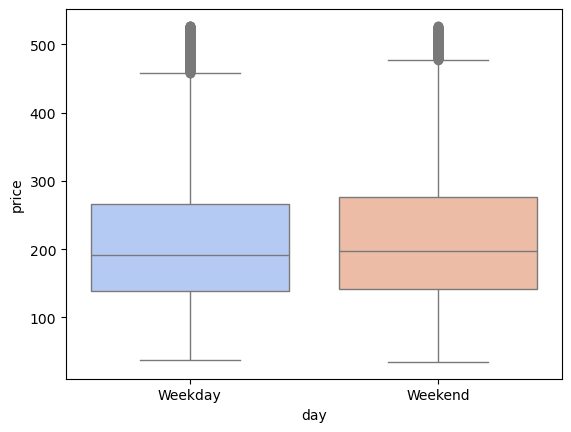

In [52]:
# Without outliers
sns.boxplot(data=df_nopriceoutliers, x='day', y='price', palette="coolwarm")
plt.show();

### Price of hosts with +4 offers vs. Price of smaller hosts

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_6605/1020038264.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='business', y='price', palette="coolwarm")


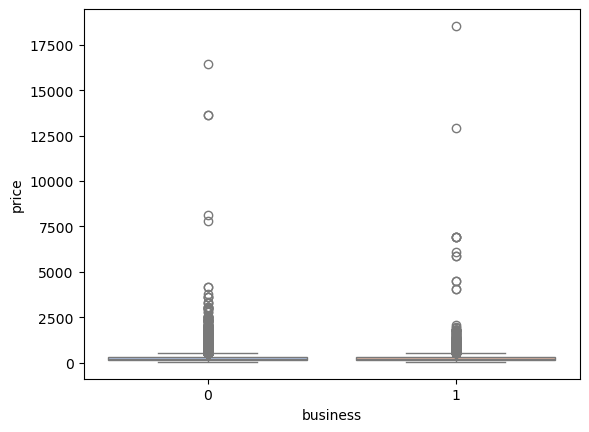

In [55]:
sns.boxplot(data=df, x='business', y='price', palette="coolwarm")
plt.show();

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_6605/1432306858.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_nopriceoutliers, x='business', y='price', palette="coolwarm")


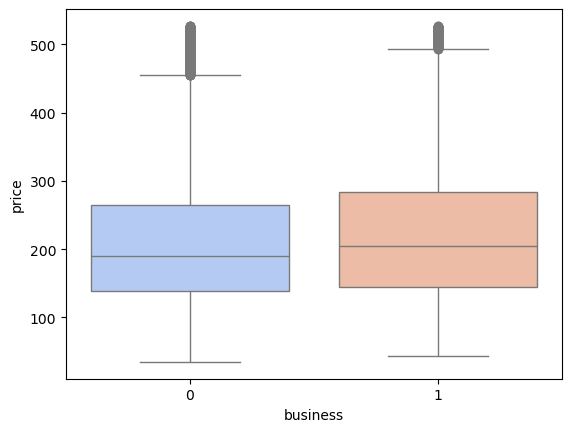

In [56]:
sns.boxplot(data=df_nopriceoutliers, x='business', y='price', palette="coolwarm")
plt.show();

## Numeric vs. Numeric variables

### Correlation heatmap

<Axes: >

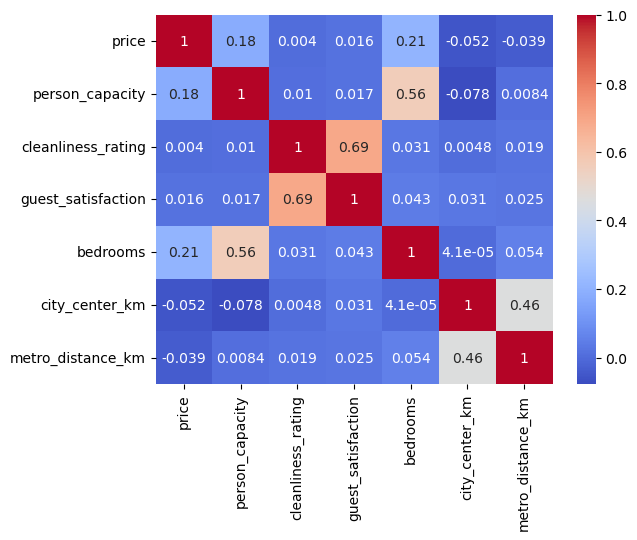

In [61]:
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

### Guest satisfaction vs. Price

In [62]:
df_nopriceoutliers["guest_satisfaction"].describe()

count    38810.000000
mean        93.063489
std          8.126064
min         20.000000
25%         90.000000
50%         95.000000
75%         98.000000
max        100.000000
Name: guest_satisfaction, dtype: float64

In [63]:
correlation = df_nopriceoutliers["guest_satisfaction"].corr(df["price"])
s_correlation = df_nopriceoutliers["guest_satisfaction"].corr(df["price"], method='spearman')
print(f"Pearson correlation: {correlation}")
print(f"Spearman correlation: {s_correlation}")

Pearson correlation: -0.004489843355365193
Spearman correlation: 0.01452614021613618


<Axes: xlabel='guest_satisfaction', ylabel='price'>

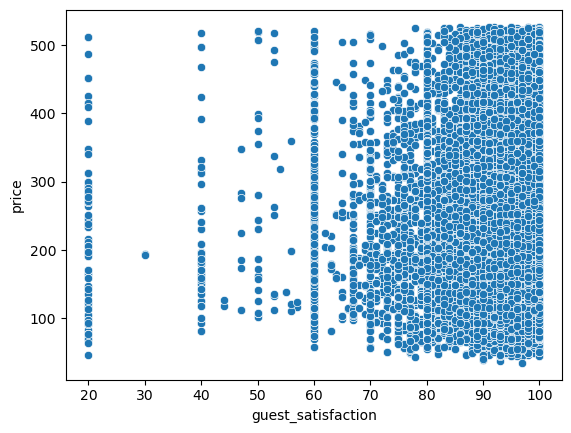

In [64]:
sns.scatterplot(data=df_nopriceoutliers, x="guest_satisfaction", y="price")

In [66]:
correlation = df_nopriceoutliers["guest_satisfaction"].corr(df["cleanliness_rating"])
s_correlation = df_nopriceoutliers["guest_satisfaction"].corr(df["cleanliness_rating"], method='spearman')
print(f"Pearson correlation: {correlation}")
print(f"Spearman correlation: {s_correlation}")

Pearson correlation: 0.69319505070689
Spearman correlation: 0.6109994027393298


<Axes: xlabel='guest_satisfaction', ylabel='cleanliness_rating'>

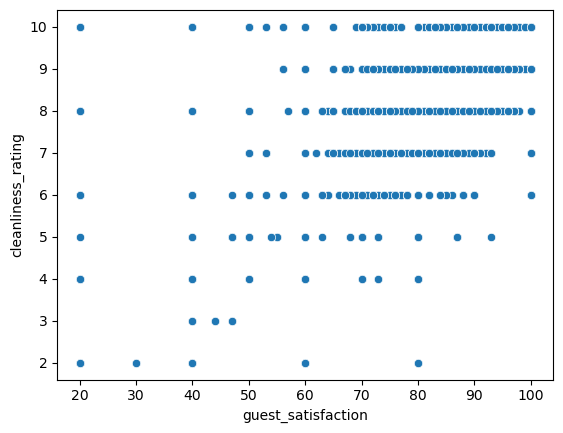

In [71]:
sns.scatterplot(data=df_nopriceoutliers, x="guest_satisfaction", y="cleanliness_rating")